In [ ]:
!pip install jieba
!pip install gensim

In [ ]:
import jieba.analyse as analyse
  
#製圖模組
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import jieba

train = []
stopwords = open('stopword.txt','r',encoding='utf8').read()
fp = open('中結巴.txt','r',encoding='utf8')
for words in fp:
  seg=jieba.cut_for_search(words)
  train.append([ word for word in seg if len(word)>1 and word not in stopwords ])
print(train)
print(len(train))

[['上北', '峰山', '稀薄', '空氣', '刺得', '入骨', '寒風', '被陽', '光照', '成金黃色', '草原'], [], ['配上', '我牙齒', '顫抖', '發出', '打擊聲', '這是', '第一', '一次', '第一次', '百岳', '日出'], [], [], [], ['凌晨', '三點', '鬧鐘', '不留', '留情', '不留情', '機裡', '大響', '疲憊', '軀實', '逃避', '起床', '這件', '這趟', '目標', '就是', '看合歡', '日出', '這裡', '放棄', '前面', '努力', '算什麼', '何況', '室友', '一些', '裝備', '就是', '希望', '我能', '順利', '完成', '日出', '願望', '世界', '全世界', '一把', '才行'], [], [], ['起床', '果然', '一瞬', '發生', '起來', '睡意', '全消', '睡意全消', '知道', '一些', '酷事', '一次', '十包', '包打', '分別', '脖子', '小腿', '腳底', '口袋', '大衣', '背包', '點亮', '頭燈', '出發'], [], [], [], [], [], [], ['正式', '出發', '已經', '點鐘', '距離合', '歡山', '登山', '大概', '40', '分鐘', '嚴格來', '經比', '預計', '時間', '晚上', '半個', '小時', '這點', '感到', '焦慮', '擔心', '一半', '太陽', '無情', '升起', '太多', '沒太多', '時間', '埋怨', '只能', '繼續', '前進', '遠離山', '莊路', '所剩', '無幾', '不論', '開車', '走路', '這時', '一樣', '瘋子', '日出'], [], [], ['夜晚', '合歡山', '令人', '嚴肅', '起來', '唯一', '光源', '頭燈', '可怕', '莫過', '聲音', '空氣寧靜', '腳步聲', '如雷', '貫耳', '會有', '一種', '世界', '全世界', '一人', '錯覺', '這時', '知道', '我要', '日出', 

In [ ]:
from gensim import corpora
from gensim.corpora import Dictionary #用來為每個出現在文本中的單詞分配了一個獨一無二的整數編號
from gensim.models import LdaModel

word_id = corpora.Dictionary(train) #幫單詞分配編號
#print(word_id)
#for number, word_ids in word_id.iteritems():    #顯示詞的編號
  #print(number, word_ids)

In [ ]:
word_num = [word_id.doc2bow(text) for text in train ]    #計算詞頻向量bow,(0,3)表編號0之文字出現3次
print(word_num)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [], [], [], [(14, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [], [], [(11, 1), (22, 1), (48, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [], [], [], [], [], [], [(14, 1), (59, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1)

In [ ]:
lda = LdaModel(corpus=word_num, id2word=word_id, num_topics=5)     #corpus：詞頻向量    
print(lda)    

LdaModel(num_terms=1580, num_topics=5, decay=0.5, chunksize=2000)


In [ ]:
lda_list=lda.print_topics(3) #呈現五個主題
print("3個主題的詞彙分布:\n")
lda_list[0]
for topic in lda_list:
  print(topic)

3個主題的詞彙分布:

(3, '0.005*"時候" + 0.005*"加油" + 0.005*"有人" + 0.005*"時間" + 0.004*"開始" + 0.004*"回到" + 0.004*"機車" + 0.004*"海水" + 0.004*"地方" + 0.003*"三天"')
(1, '0.005*"11" + 0.005*"天氣" + 0.004*"接著" + 0.004*"找到" + 0.004*"一路" + 0.004*"地方" + 0.004*"山洞" + 0.004*"海水" + 0.004*"太陽" + 0.003*"慢慢"')
(2, '0.006*"知道" + 0.005*"差不多" + 0.004*"生物" + 0.004*"下面" + 0.004*"海水" + 0.004*"感覺" + 0.004*"日出" + 0.004*"開始" + 0.003*"稀薄" + 0.003*"空氣"')


In [ ]:
#轉字典
word = []
weight = []
for index, topic in lda.show_topics(formatted=False, num_words= 10):
    # print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    word.append([w[0] for w in topic])
    weight.append([w[1] for w in topic])

In [ ]:
# new_key = {}
# for i in range(4):
#   for j in range(10):
#     if word[i][j] in new_key:
#       if new_key[word[i][j]] > weight[i][j]:
#         #print(word[i][j],new_key[word[i][j]],weight[i][j])
#         pass
#       elif new_key[word[i][j]] == weight[i][j]:
#         pass
#       else:
#         # print(word[i][j],new_key[word[i][j]],weight[i][j])
#         new_key[word[i][j]] = weight[i][j]
#     else:
#       new_key[word[i][j]] = weight[i][j]

In [ ]:
import numpy as np
from PIL import Image 

sp_mask1 = np.array(Image.open('/content/drive/MyDrive/大學/NLP/swallow.jpg'))

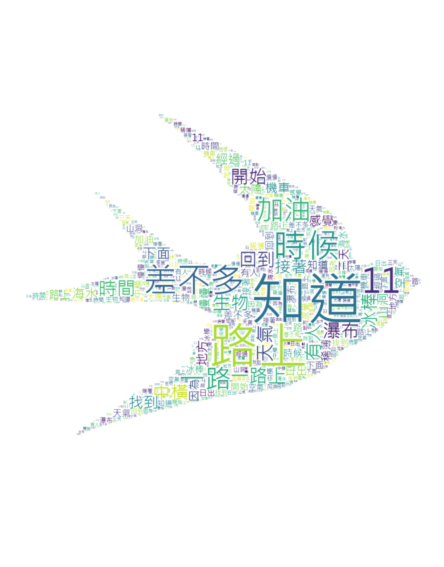

In [ ]:
from wordcloud import WordCloud 
wc = WordCloud(font_path="/content/drive/MyDrive/大學/NLP/WORDTYPE.ttf", repeat=True,background_color="white",
               max_words=2000, mask=sp_mask1,colormap="viridis")

wc.generate_from_frequencies(new_key)#輸入欲繪製文字雲之文件(須為+)

plt.figure(figsize=(8,6), dpi=120)   #figszize(調整圖案寬和高)  dpi(參數指定繪圖對象的分辨率,即每英吋多少像素)) 
plt.imshow(wc, interpolation='gaussian')  #繪製圖片
plt.axis("off")   #是否顯示坐標尺
plt.show()


https://www.dcard.tw/f/travel/p/237751913

http://www.wretch.twbbs.org/album/album.php?id=jameswang&book=2

http://www.wretch.twbbs.org/album/show.php?i=jameswang&b=2&f=1085049685.jpg

http://www.wretch.twbbs.org/album/album.php?id=jameswang&book=3

https://www.travelreadyhk.com/travel-blog/asia/japan/okinawa/item/1607-churaumi-aquarium-okinawa